# Basic Data Science in Python - Handin 3
## Leihui Li; leihui@mpe.au.dk ##

This handin is indiviual and mandatory to pass the course.

Hand in this .ipynb file and the compiled pdf, no later than 27/10 kl 09:30.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Exercise 2: Classify Wine (Handin)
Use a decision tree to classify wine: Train on the training data, and test your fit on the test data. Print the In Sample Score and Test Score.

Try to change the hyperparameters a bit around to get the best Test score.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

df = pd.DataFrame(X, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
### YOUR CODE HERE
from sklearn import tree
np.set_printoptions(precision=3, suppress=True)

new_X_train = X_train
new_X_test = X_test

# Try to use PCA to reduce the dimension of the feature, but looks like not good so much
# print (X_train.shape)
# pca = PCA(n_components=12)# 10, 11, 12
# pca.fit(X_train)
# new_X_train = pca.transform(X_train)
# new_X_test = pca.transform(X_test)

print (new_X_train.shape, new_X_test.shape)
print (new_X_train[0].tolist(),'\n', new_X_test[0].tolist())

clf_model = tree.DecisionTreeClassifier(
    criterion='entropy', 
    splitter = 'random', 
    random_state=42, 
    max_depth=6,
    #min_impurity_decrease = 0.01,
    min_samples_leaf=1,
    min_samples_split=2)
clf_model = clf_model.fit(new_X_train, y_train)
clf_score_sample, clf_score_test = clf_model.score(new_X_train,y_train), clf_model.score(new_X_test,y_test)     
#     print (clf_model.get_params())
print (f"sampe score: {clf_score_sample} test score: {clf_score_test}")

(133, 13) (45, 13)
[12.52, 2.43, 2.17, 21.0, 88.0, 2.55, 2.27, 0.26, 1.22, 2.0, 0.9, 2.78, 325.0] 
 [13.52, 3.17, 2.72, 23.5, 97.0, 1.55, 0.52, 0.5, 0.55, 4.35, 0.89, 2.06, 520.0]
sampe score: 1.0 test score: 0.9111111111111111


In [4]:
import random

np.set_printoptions(precision=6, suppress=True)
x_i = random.randint(0, len(X_test))
print (f"we select the {x_i}th among the test data")
print (f"Ground Truth:\n{X_test[x_i].tolist()} -> {wine.target_names[y_test[x_i]]}")
print (f"Predict Result:\n{wine.target_names[clf_model.predict(X_test[x_i].reshape(1, -1))].item()}")

we select the 21th among the test data
Ground Truth:
[12.34, 2.45, 2.46, 21.0, 98.0, 2.56, 2.11, 0.34, 1.31, 2.8, 0.8, 3.38, 438.0] -> class_1
Predict Result:
class_1


In [5]:
# Have a test on the generated tree
text_representation = tree.export_text(clf_model)
print(text_representation)

|--- feature_11 <= 2.12
|   |--- feature_9 <= 3.92
|   |   |--- feature_0 <= 12.32
|   |   |   |--- class: 2
|   |   |--- feature_0 >  12.32
|   |   |   |--- class: 1
|   |--- feature_9 >  3.92
|   |   |--- feature_11 <= 2.00
|   |   |   |--- class: 2
|   |   |--- feature_11 >  2.00
|   |   |   |--- feature_6 <= 1.42
|   |   |   |   |--- class: 2
|   |   |   |--- feature_6 >  1.42
|   |   |   |   |--- class: 1
|--- feature_11 >  2.12
|   |--- feature_12 <= 515.76
|   |   |--- class: 1
|   |--- feature_12 >  515.76
|   |   |--- feature_9 <= 3.86
|   |   |   |--- feature_9 <= 3.42
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  3.42
|   |   |   |   |--- feature_2 <= 2.13
|   |   |   |   |   |--- feature_7 <= 0.30
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  0.30
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  2.13
|   |   |   |   |   |--- class: 0
|   |   |--- feature_9 >  3.86
|   |   |   |--- feature_6 <= 2.23
|   |   |

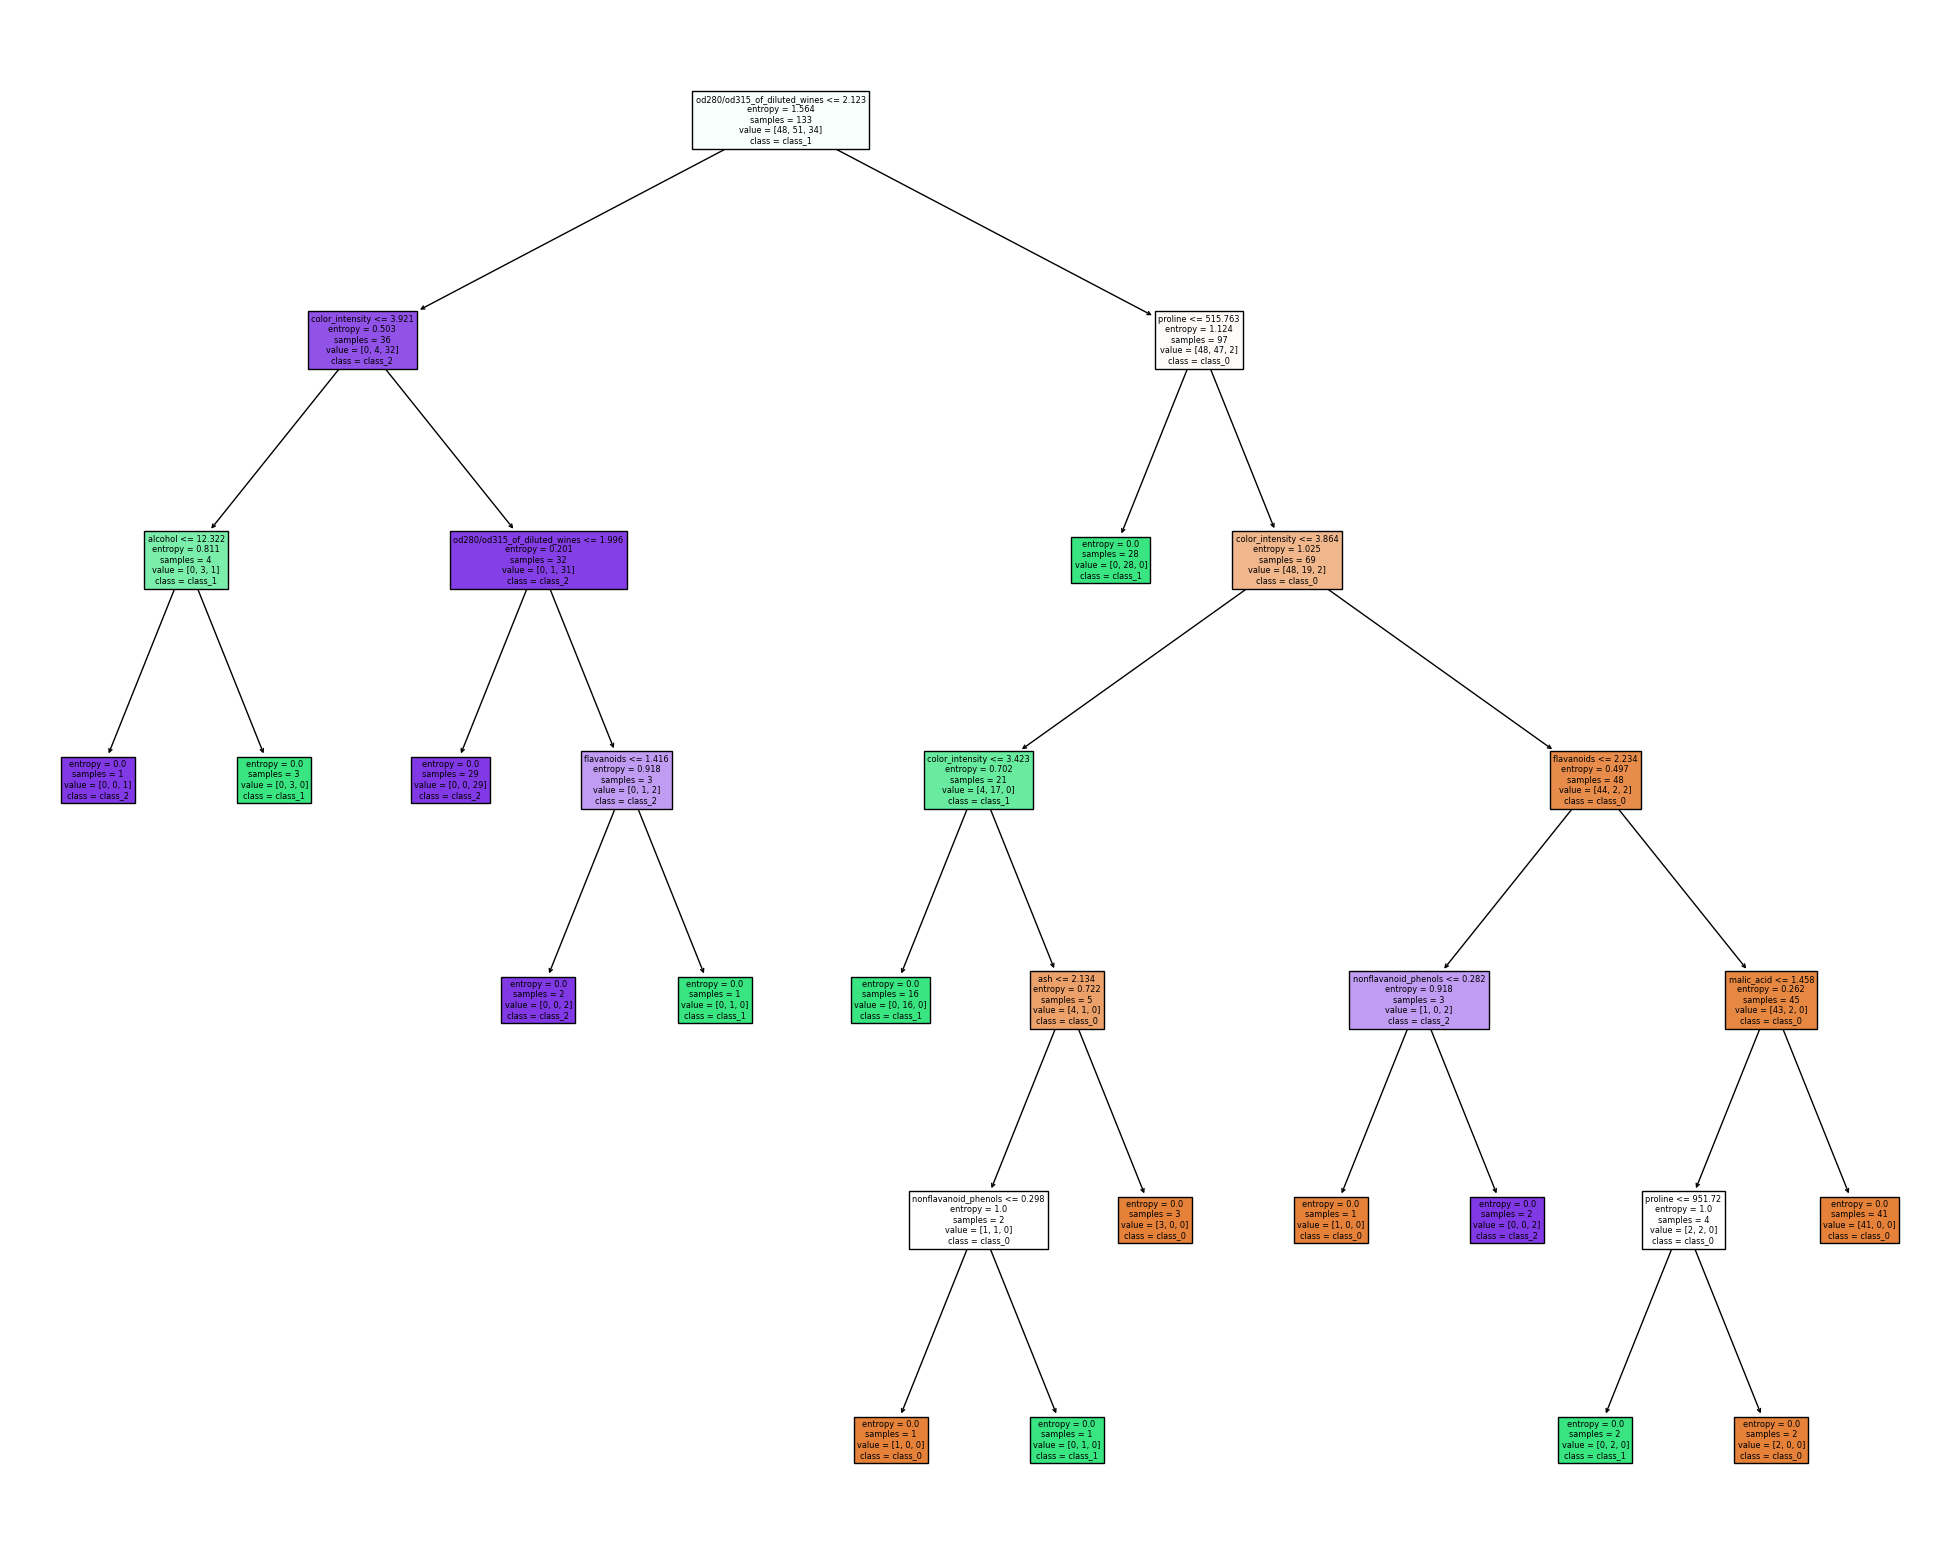

In [6]:
# Lets see the tree!
plt.figure(figsize=(25,20)) # Resize figure
sklearn.tree.plot_tree(clf_model, filled=True, class_names=wine.target_names, feature_names=wine.feature_names)
plt.show()